## Analysis of the similarity and the average within age ranges

### Requirements

File needed to run this notebook: "AgeDB_Sim_Feat_Result.csv" (produced by AgeDB_Code_2.ipynb) and "AgeDB_Cleaned_Individual.csv" (produced by AgeDB_Code.ipynb).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Get our latest dataframe

AgeDB_images = pd.read_csv("createdCSV/AgeDB_result.csv")
AgeDB_images


,Unnamed: 0,ID,Name,Gender,First Image,First Age,First Age Range,Second Image,Second Age,Second Age Range,First Image Features,Second Image Features,Cosine Similarity
0,0,3,HelenHunt,0,10058_HelenHunt_45_f.jpg,45,41-50,10044_HelenHunt_32_f.jpg,32,31-40,[-0.02452355 -0.04986161 0.10224585 -0.004617...,[-2.34069191e-02 -3.43213081e-02 5.58017269e-...,0.637691
1,1,3,HelenHunt,0,10058_HelenHunt_45_f.jpg,45,41-50,10045_HelenHunt_33_f.jpg,33,31-40,[-0.02452355 -0.04986161 0.10224585 -0.004617...,[-0.02852621 -0.01994888 0.02602013 -0.039852...,0.615305
2,2,3,HelenHunt,0,10058_HelenHunt_45_f.jpg,45,41-50,10046_HelenHunt_34_f.jpg,34,31-40,[-0.02452355 -0.04986161 0.10224585 -0.004617...,[-1.90598574e-02 1.06462231e-03 4.85058613e-...,0.713908
3,3,3,HelenHunt,0,10058_HelenHunt_45_f.jpg,45,41-50,10057_HelenHunt_44_f.jpg,44,41-50,[-0.02452355 -0.04986161 0.10224585 -0.004617...,[-0.03781101 -0.05119143 0.08856339 -0.027030...,0.887338
4,4,3,HelenHunt,0,10058_HelenHunt_45_f.jpg,45,41-50,10047_HelenHunt_34_f.jpg,34,31-40,[-0.02452355 -0.04986161 0.10224585 -0.004617...,[-4.50187288e-02 -1.33672869e-02 3.94325182e-...,0.572509
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177421,523,566,ElkeSommer,0,9971_ElkeSommer_62_f.jpg,62,61-70,9960_ElkeSommer_42_f.jpg,42,41-50,[ 2.33288780e-02 -9.15972292e-02 -2.28940696e-...,[ 0.04827074 0.00928634 -0.01057999 0.039533...,0.467892
177422,524,566,ElkeSommer,0,9971_ElkeSommer_62_f.jpg,62,61-70,9946_ElkeSommer_18_f.jpg,18,11-20,[ 2.33288780e-02 -9.15972292e-02 -2.28940696e-...,[-4.79027145e-02 3.94340046e-02 6.72460347e-...,0.170420
177423,525,566,ElkeSommer,0,9973_ElkeSommer_64_f.jpg,64,61-70,9960_ElkeSommer_42_f.jpg,42,41-50,[ 3.15611204e-03 -5.97761460e-02 -4.79066037e-...,[ 0.04827074 0.00928634 -0.01057999 0.039533...,0.481166
177424,526,566,ElkeSommer,0,9973_ElkeSommer_64_f.jpg,64,61-70,9946_ElkeSommer_18_f.jpg,18,11-20,[ 3.15611204e-03 -5.97761460e-02 -4.79066037e-...,[-4.79027145e-02 3.94340046e-02 6.72460347e-...,0.248497


In [3]:
CASIA_images = pd.read_csv("/proj/snic2021-22-918/CASIA_result.csv")
CASIA_images

,Unnamed: 0,ID,Gender,First Image,First Age,First Age Range,Second Image,Second Age,Second Age Range,First Image Features,Second Image Features,Cosine Similarity
0,0,2,1,000002_00000273.jpg,44.5,41-50,000002_00000274.jpg,46.0,41-50,[ 4.14859205e-02 4.65242751e-02 4.07880312e-...,[ 0.06495494 -0.01069948 -0.02760548 0.046603...,0.528167
1,1,2,1,000002_00000273.jpg,44.5,41-50,000002_00000275.jpg,56.0,51-60,[ 4.14859205e-02 4.65242751e-02 4.07880312e-...,[ 2.98649985e-02 2.47298833e-02 6.24481738e-...,0.579516
2,2,2,1,000002_00000273.jpg,44.5,41-50,000002_00000276.jpg,31.5,31-40,[ 4.14859205e-02 4.65242751e-02 4.07880312e-...,[-0.05003019 -0.04056443 0.09071848 -0.004077...,0.500336
3,3,2,1,000002_00000273.jpg,44.5,41-50,000002_00000277.jpg,34.5,31-40,[ 4.14859205e-02 4.65242751e-02 4.07880312e-...,[-5.25349379e-02 -8.33794102e-02 8.54413584e-...,0.397464
4,4,2,1,000002_00000273.jpg,44.5,41-50,000002_00000279.jpg,46.0,41-50,[ 4.14859205e-02 4.65242751e-02 4.07880312e-...,[-9.69949812e-02 -2.99791265e-02 6.55681491e-...,0.645424
...,...,...,...,...,...,...,...,...,...,...,...,...
2280266,523,10553,1,010553_00490113.jpg,34.0,31-40,010553_00490115.jpg,26.0,21-30,[ 6.78437725e-02 7.66028464e-02 -2.29133125e-...,[ 0.00634021 0.00241421 -0.02715038 -0.018446...,0.527963
2280267,524,10553,1,010553_00490113.jpg,34.0,31-40,010553_00490116.jpg,36.5,31-40,[ 6.78437725e-02 7.66028464e-02 -2.29133125e-...,[ 3.47039513e-02 5.25199063e-02 -6.54469337e-...,0.595495
2280268,525,10553,1,010553_00490114.jpg,34.5,31-40,010553_00490115.jpg,26.0,21-30,[ 3.76005359e-02 4.49786857e-02 2.15231832e-...,[ 0.00634021 0.00241421 -0.02715038 -0.018446...,0.509435
2280269,526,10553,1,010553_00490114.jpg,34.5,31-40,010553_00490116.jpg,36.5,31-40,[ 3.76005359e-02 4.49786857e-02 2.15231832e-...,[ 3.47039513e-02 5.25199063e-02 -6.54469337e-...,0.602436


In [4]:
# Meta data for each individual person

AgeDB_individuals = pd.read_csv("createdCSV/AgeDB_Cleaned_Individual.csv")
AgeDB_individuals

,Unnamed: 0,ID,Name,Min Age,Max Age,Age Span,Number of Age Ranges,Number of Images,Gender
0,0,3,HelenHunt,10,51,41,6,38,0.0
1,1,4,JaneBirkin,19,68,49,6,39,0.0
2,2,5,PaulAnka,15,72,57,7,41,1.0
3,3,6,JaneFonda,25,74,49,6,30,0.0
4,4,13,MarietteHartley,21,73,52,6,33,0.0
...,...,...,...,...,...,...,...,...,...
269,269,556,MegRyan,7,77,70,7,34,0.0
270,270,557,DorisDay,17,82,65,7,49,0.0
271,271,559,JaneAsher,6,67,61,7,34,0.0
272,272,565,AliMacGraw,25,74,49,6,34,0.0


In [5]:
CASIA_individuals = pd.read_csv("createdCSV/CASIA_Cleaned_Individual.csv")
CASIA_individuals

,Unnamed: 0,ID,Min Age,Max Age,Age Span,Number of Age Ranges,Number of Images,Gender
0,0,2,31.0,69.0,38.0,4,60,1.0
1,1,17,22.5,47.5,25.0,3,36,0.0
2,2,24,17.0,83.0,66.0,7,187,1.0
3,3,29,21.5,74.0,52.5,6,88,1.0
4,4,30,20.0,77.0,57.0,6,64,1.0
...,...,...,...,...,...,...,...,...
1269,1269,10497,9.5,45.0,35.5,4,37,1.0
1270,1270,10541,24.5,56.0,31.5,4,30,1.0
1271,1271,10545,23.0,60.0,37.0,4,30,1.0
1272,1272,10546,27.0,43.5,16.5,3,42,1.0


In [6]:
# Function to produce similarity dataframe and plot

def produce_similarity_result(df_large, df_indi, gender='all', fill_var='yes', dataset='Not specified'):
    """
    Purpose: Function to produce a dataframe with average similarities and an explanatory plot

    Input:

    Output: 
    
    """

    # Part 1: Creating a dataframe with all average similarities

    # Creating an empty dataframe
    ranges = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '70+']
    combo_ranges = []
    for i in range(len(ranges)):
        for j in range(i, len(ranges)):
            key = str(ranges[i]) + '_vs_' + str(ranges[j])
            combo_ranges.append(key)

    df_average_simi = pd.DataFrame(columns=["ID"] + combo_ranges)

    unique_id_list = df_indi["ID"].to_list()
    

    for id in unique_id_list:
        
        # Creating a dict where all values from one person is stored
        dict_average_person = {}
        for i in combo_ranges:
            dict_average_person[i] = []
        
        all_rows_id = df_large.loc[df_large["ID"] == id]
        individual_gender = df_indi.loc[df_indi["ID"] == id, "Gender"].values[0]
        if (gender != individual_gender) and (gender != 'all'):
            pass
        else:
            first_ranges = all_rows_id["First Age Range"].to_list()
            second_ranges = all_rows_id["Second Age Range"].to_list()
            sims = all_rows_id["Cosine Similarity"].to_list()
            
            number_of_comp = len(first_ranges)
            for i in range(number_of_comp):
                comparison = str(first_ranges[i]) + '_vs_' + str(second_ranges[i])
                
                if int(first_ranges[i][0]) > int(second_ranges[i][0]):
                    comparison = str(second_ranges[i]) + '_vs_' + str(first_ranges[i])
                
                dict_average_person[comparison].append(sims[i])

            temp_values = []
            temp_values.append(id)
            for key, value in dict_average_person.items():

                if len(value) == 0:
                    dict_average_person[key] = np.NaN
                    temp_values.append(dict_average_person[key])
                else:
                    dict_average_person[key] = np.average(value)
                    temp_values.append(dict_average_person[key])

            df_average_simi.loc[len(df_average_simi)] = temp_values
    

    # Part 2: Creating a dictionary with the results
    result_dict = {}
    for age_combo in combo_ranges:
        result_dict[age_combo] = [df_average_simi[age_combo].mean(axis=0,skipna=True), df_average_simi[age_combo].var(axis=0,skipna=True), df_average_simi[age_combo].std(axis=0,skipna=True)]  
    
    # Part 3: Plotting result
    y_0_10, y_11_20, y_21_30, y_31_40, y_41_50, y_51_60, y_61_70, y_70  = [], [], [], [], [], [], [], []
    var_0_10, var_11_20, var_21_30, var_31_40, var_41_50, var_51_60, var_61_70, var_70 = [], [], [], [], [], [], [], []

    for key, value in result_dict.items():

        

        if key[0] == '0':
            y_0_10.append(value[0])
            var_0_10.append(value[1])
        elif key[0] == '1':
            y_11_20.append(value[0])
            var_11_20.append(value[1])
        elif key[0] == '2':
            y_21_30.append(value[0])
            var_21_30.append(value[1])
        elif key[0] == '3':
            y_31_40.append(value[0])
            var_31_40.append(value[1])
        elif key[0] == '4':
            y_41_50.append(value[0])
            var_41_50.append(value[1])
        elif key[0] == '5':
            y_51_60.append(value[0])
            var_51_60.append(value[1])
        elif key[0] == '6':
            y_61_70.append(value[0])
            var_61_70.append(value[1])
        elif key[0] == '7':
            y_70.append(value[0])
            var_70.append(value[1])


    x_plot_points = [i for i in range(8)]
    x_ticks = ranges
    plt.xticks(x_plot_points, x_ticks)
    plt.ylim(0.1,0.65)
    plt.xlim(-1,8)
    plt.xlabel("Different Age Range")
    plt.ylabel("Average similarities")
    
    if gender == 0:
        gender = 'males only'
    elif gender == 1:
        gender = 'females only'
    else:
        gender = 'both gender'

    plt.title(f"{dataset} - Face similarities for {gender}")

    # Plotting similarity points
    plt.plot(x_plot_points, y_0_10, '.r-', label='Compare age range 0-10 with "older" age ranges.')
    plt.plot(x_plot_points[1:], y_11_20, '.b-', label='Compare age range 11-20 with "older" age ranges.')
    plt.plot(x_plot_points[2:], y_21_30, '.y-', label='Compare age range 21-30 with "older" age ranges.')
    plt.plot(x_plot_points[3:], y_31_40, '.g-', label='Compare age range 31-40 with "older" age ranges.')
    plt.plot(x_plot_points[4:], y_41_50, '.m-', label='Compare age range 41-50 with "older" age ranges.')
    plt.plot(x_plot_points[5:], y_51_60, '.c-', label='Compare age range 51-60 with "older" age ranges.')
    plt.plot(x_plot_points[6:], y_61_70, '.k-', label='Compare age range 61-70 with "older" age ranges.')
    plt.scatter(x_plot_points[7:], y_70, c='lime', s=10, label='Compare of images within age range 70+.')


    # Plotting variance 
    if fill_var == 'yes':
        for i in [2,1]:
            over_0_10, under_0_10 = np.array(y_0_10) + i*np.array(var_0_10), np.array(y_0_10) - i*np.array(var_0_10)
            over_11_20, under_11_20 = np.array(y_11_20) + i*np.array(var_11_20), np.array(y_11_20) - i*np.array(var_11_20)
            over_21_30, under_21_30 = np.array(y_21_30) + i*np.array(var_21_30), np.array(y_21_30) - i*np.array(var_21_30)
            over_31_40, under_31_40 = np.array(y_31_40) + i*np.array(var_31_40), np.array(y_31_40) - i*np.array(var_31_40)
            over_41_50, under_41_50 = np.array(y_41_50) + i*np.array(var_41_50), np.array(y_41_50) - i*np.array(var_41_50)
            over_51_60, under_51_60 = np.array(y_51_60) + i*np.array(var_51_60), np.array(y_51_60) - i*np.array(var_51_60)
            over_61_70, under_61_70 = np.array(y_61_70) + i*np.array(var_61_70), np.array(y_61_70) - i*np.array(var_61_70)
            over_70, under_70 = np.array(y_70) + np.array(var_70), np.array(y_70) - np.array(var_70)


            plt.fill_between(x_plot_points, over_0_10, under_0_10, where=(over_0_10 > under_0_10), color=str(0.5 + 0.15*i))
            plt.fill_between(x_plot_points[1:], over_11_20, under_11_20, where=(over_11_20 > under_11_20), color=str(0.5 + 0.15*i))
            plt.fill_between(x_plot_points[2:], over_21_30, under_21_30, where=(over_21_30 > under_21_30), color=str(0.5 + 0.15*i))
            plt.fill_between(x_plot_points[3:], over_31_40, under_31_40, where=(over_31_40 > under_31_40), color=str(0.5 + 0.15*i))
            plt.fill_between(x_plot_points[4:], over_41_50, under_41_50, where=(over_41_50 > under_41_50), color=str(0.5 + 0.15*i))
            plt.fill_between(x_plot_points[5:], over_51_60, under_51_60, where=(over_51_60 > under_51_60), color=str(0.5 + 0.15*i))
            plt.fill_between(x_plot_points[6:], over_61_70, under_61_70, where=(over_61_70 > under_61_70), color=str(0.5 + 0.15*i))
            plt.fill_between(x_plot_points[7:], over_70, under_70, where=(over_70 > under_70), color=str(0.5 + 0.15*i))


    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

    #return result_dict

## Analysis of each feature vector - PCA and clustering methods

In [7]:
# PCA for multiple persons

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


def get_PCA_dataframe(df_im):
    
    """
    Creating a dataframe with PCA and the first 5 components
    """

    list_of_images = np.unique(df_im["First Image"].to_list())
    column_list = ['feat' + str(i) for i in range(512)] + ['target (age range)']
    df_features = pd.DataFrame(columns=column_list)

    for filename in list_of_images:
        feature_vector = df_im.loc[df_im["First Image"] == filename, "First Image Features"].values[0]
        age_range = df_im.loc[df_im["First Image"] == filename, "First Age Range"].values[0]
        feature_vector = feature_vector[1:-1].split(" ")
        feat = []
        for i in feature_vector:
            if len(i) != 0:
                i = i.replace("\n", "")
                feat.append(float(i))
        feat.append(age_range)
        df_features.loc[len(df_features)] = feat
  
    features_list = column_list[:-1]

    # Separating out the features
    X = df_features.loc[:, features_list].values
    # Standardizing the features
    X = StandardScaler().fit_transform(X)
    
    pca = PCA(n_components = 5)

    principalComponents = pca.fit_transform(X)

    df_principal = pd.DataFrame(data = principalComponents
                 , columns = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4', 'Principal Component 5'])

    df_pca_result = pd.concat([df_principal, df_features[['target (age range)']]], axis = 1)
    
    return df_pca_result, pca.explained_variance_ratio_


In [8]:
AgeDB_images_men = AgeDB_images.loc[AgeDB_images["Gender"] == 1]
AgeDB_images_women = AgeDB_images.loc[AgeDB_images["Gender"] == 0]

CASIA_images_men = CASIA_images.loc[CASIA_images["Gender"] == 1]
CASIA_images_women = CASIA_images.loc[CASIA_images["Gender"] == 0]


In [ ]:
AgeDB_df_pca, AgeDB_ratio_pca = get_PCA_dataframe(AgeDB_images)
AgeDB_df_pca_men, AgeDB_ratio_pca_men = get_PCA_dataframe(AgeDB_images_men)
AgeDB_df_pca_women, AgeDB_ratio_pca_women = get_PCA_dataframe(AgeDB_images_women)

CASIA_df_pca, CASIA_ratio_pca = get_PCA_dataframe(CASIA_images)
CASIA_df_pca_men, CASIA_ratio_pca_men = get_PCA_dataframe(CASIA_images_men)


In [16]:
CASIA_df_pca_women, CASIA_ratio_pca_women = get_PCA_dataframe(CASIA_images_women)

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,target (age range)
0,0.612102,-0.511490,-0.317177,0.403158,-1.956663,41-50
1,3.103964,2.747002,-0.317224,-0.509449,-1.891044,41-50
2,1.803979,0.399305,-1.267742,0.800476,-1.858129,51-60
3,-3.158082,-0.722947,-0.571437,1.513056,0.196117,31-40
4,-2.447821,-1.812754,-2.317231,-0.853738,0.000126,31-40
...,...,...,...,...,...,...
64405,-3.315320,1.543128,-0.096249,0.323215,0.365603,31-40
64406,-2.081973,-0.697294,0.375893,0.265244,1.509905,31-40
64407,1.085700,-0.572736,0.860692,-1.052726,-0.316049,31-40
64408,-1.189844,-2.065135,0.100732,0.351087,-0.644260,31-40


In [17]:
# Plotting PCA result

def plot_PCA_result(df, first_comp, second_comp, dataset, gender):
    """
    Input can only be example first_comp = 'Principal Component i' where i in [1,2,3,4,5]
    """
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel(first_comp, fontsize = 15)
    ax.set_ylabel(second_comp, fontsize = 15)
    overhead_title = str(dataset) + ' - ' + str(gender)
    ax.set_title(overhead_title, fontsize = 20)
    targets = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '70+']
    colors = ['r', 'b', 'y', 'g', 'm', 'c', 'k', 'dimgray']
    for target, color in zip(targets,colors):
        indicesToKeep = df['target (age range)'] == target
        ax.scatter(df.loc[indicesToKeep, first_comp]
                   , df.loc[indicesToKeep, second_comp]
                   , c = color
                   , s = 5)
    ax.legend(targets)
    ax.grid()

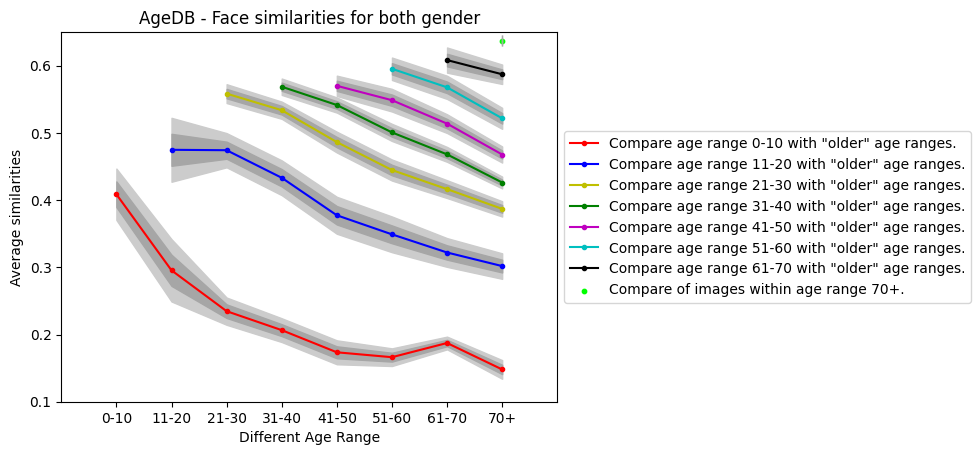

In [18]:
produce_similarity_result(AgeDB_images, AgeDB_individuals, gender='all', fill_var='yes', dataset='AgeDB')

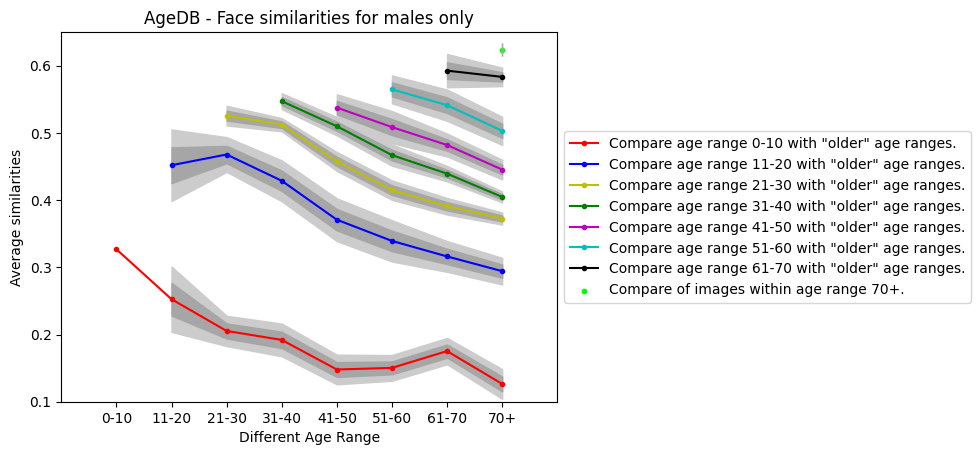

In [19]:
produce_similarity_result(AgeDB_images, AgeDB_individuals, gender=0, fill_var='yes', dataset='AgeDB')

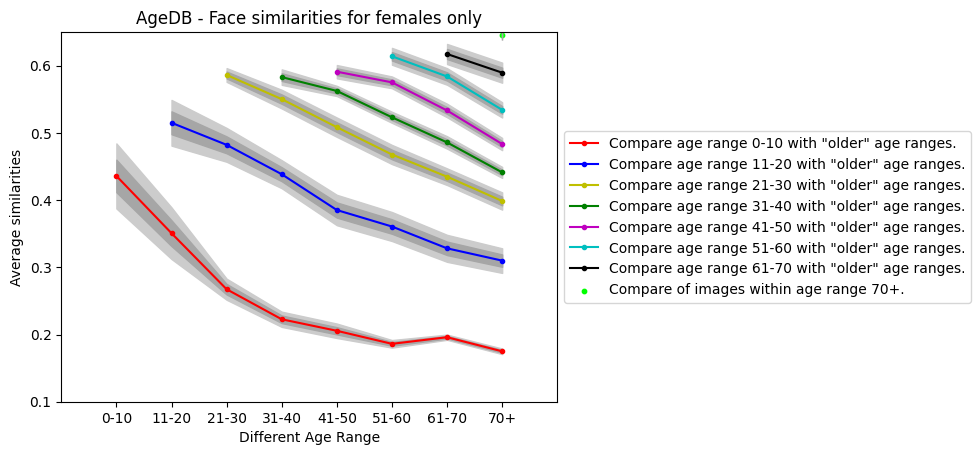

In [20]:
produce_similarity_result(AgeDB_images, AgeDB_individuals, gender=1, fill_var='yes', dataset='AgeDB')

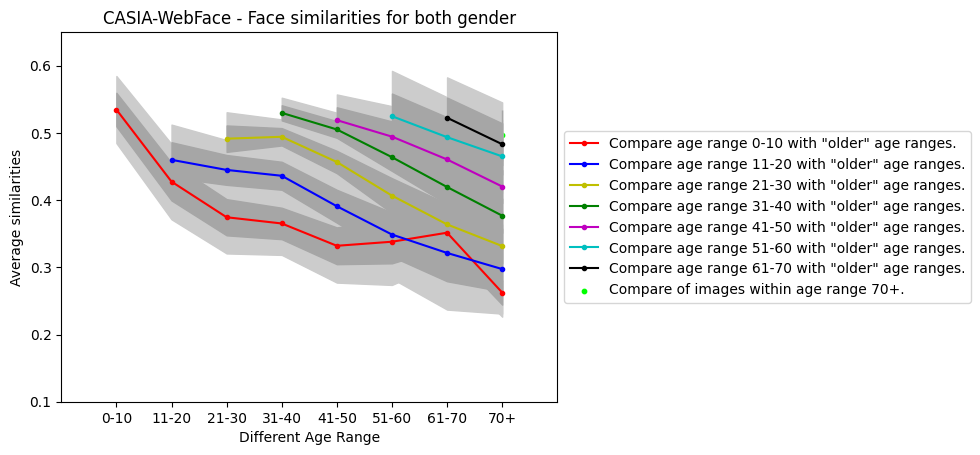

In [21]:
produce_similarity_result(CASIA_images, CASIA_individuals, gender='all', fill_var='yes', dataset='CASIA-WebFace')

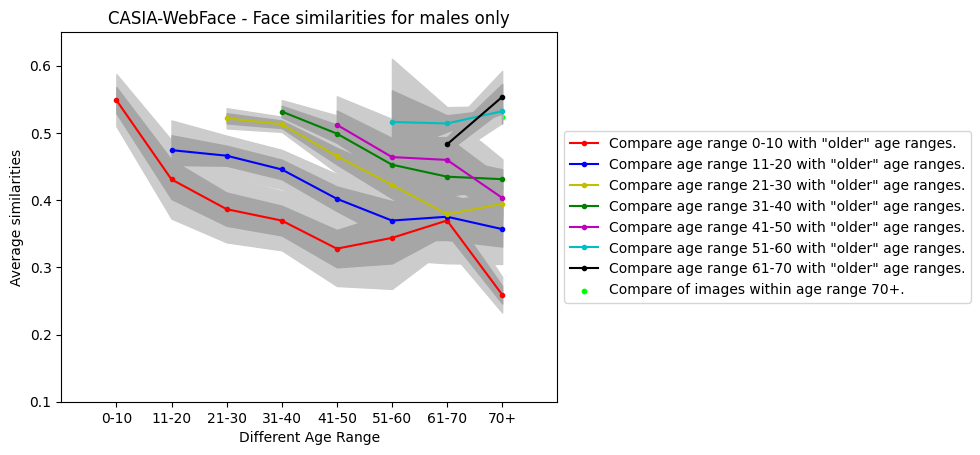

In [22]:
produce_similarity_result(CASIA_images, CASIA_individuals, gender=0, fill_var='yes', dataset='CASIA-WebFace')

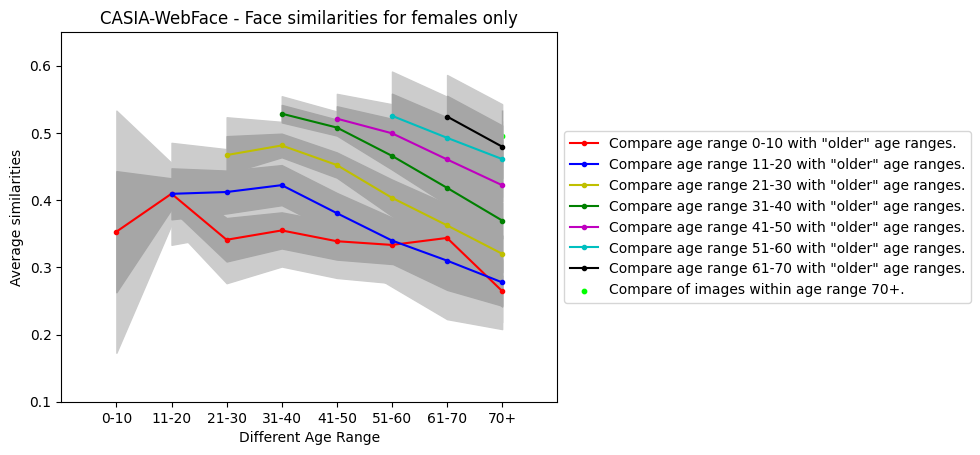

In [23]:
produce_similarity_result(CASIA_images, CASIA_individuals, gender=1, fill_var='yes', dataset='CASIA-WebFace')

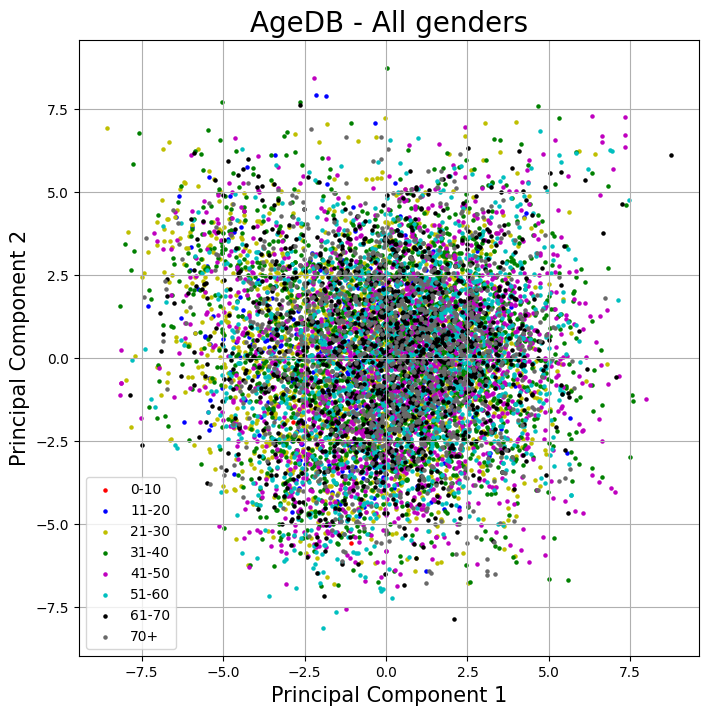

In [24]:
plot_PCA_result(AgeDB_df_pca, 'Principal Component 1', 'Principal Component 2', 'AgeDB', 'All genders')

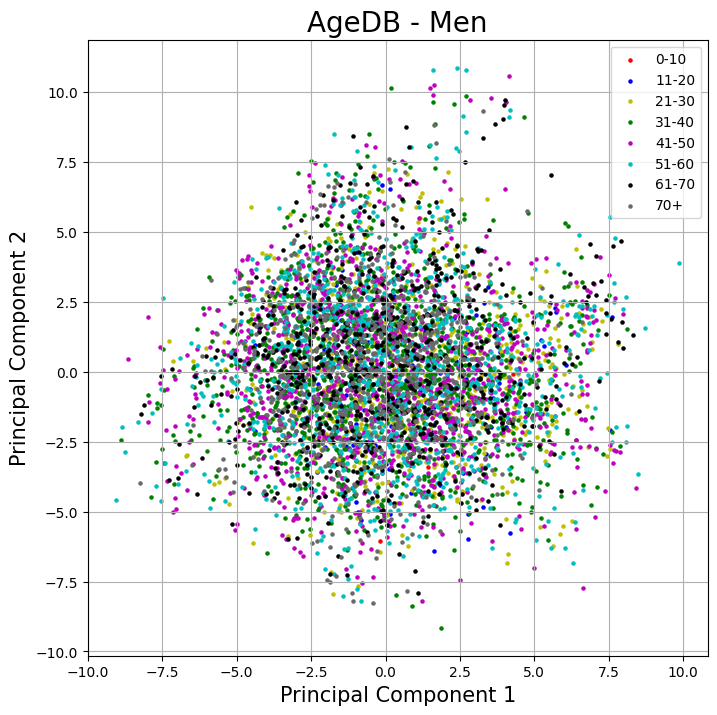

In [25]:
plot_PCA_result(AgeDB_df_pca_men, 'Principal Component 1', 'Principal Component 2', 'AgeDB', 'Men')

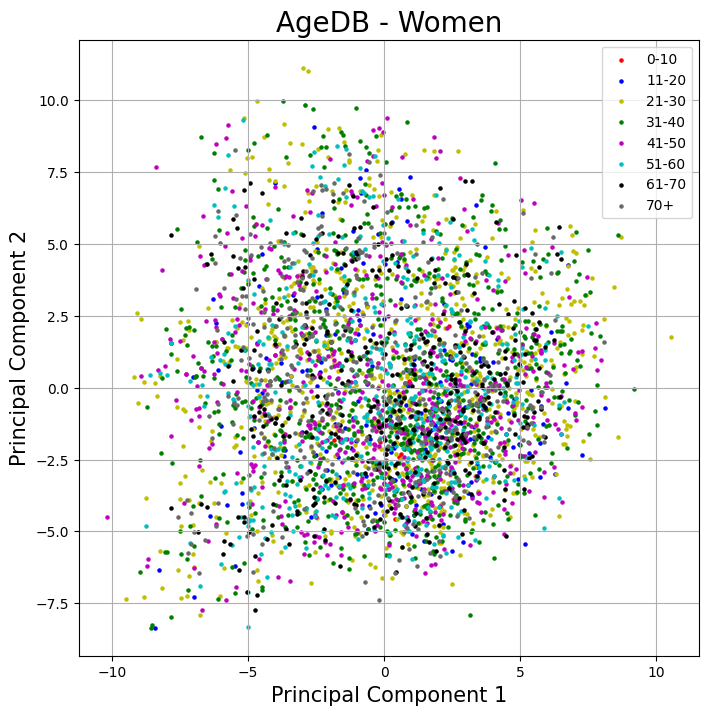

In [26]:
plot_PCA_result(AgeDB_df_pca_women, 'Principal Component 1', 'Principal Component 2', 'AgeDB', 'Women')

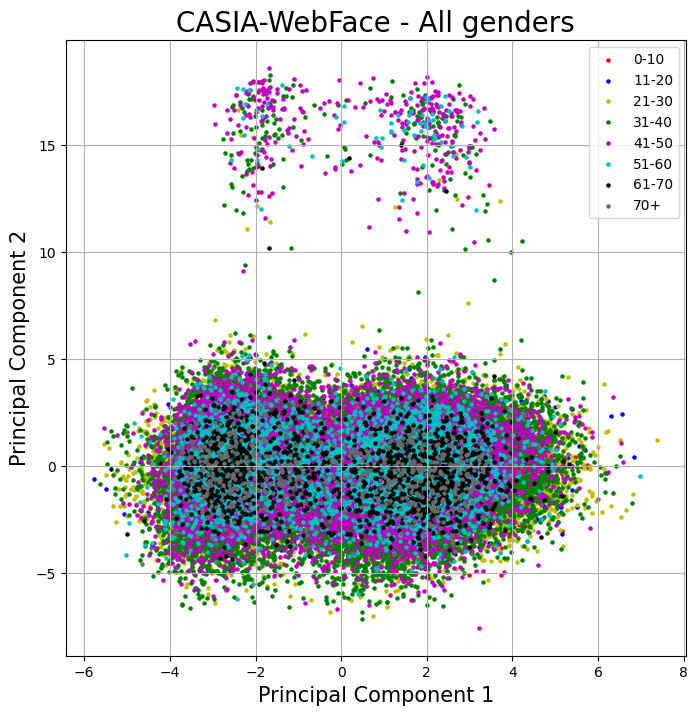

In [27]:
plot_PCA_result(CASIA_df_pca, 'Principal Component 1', 'Principal Component 2', 'CASIA-WebFace', 'All genders')

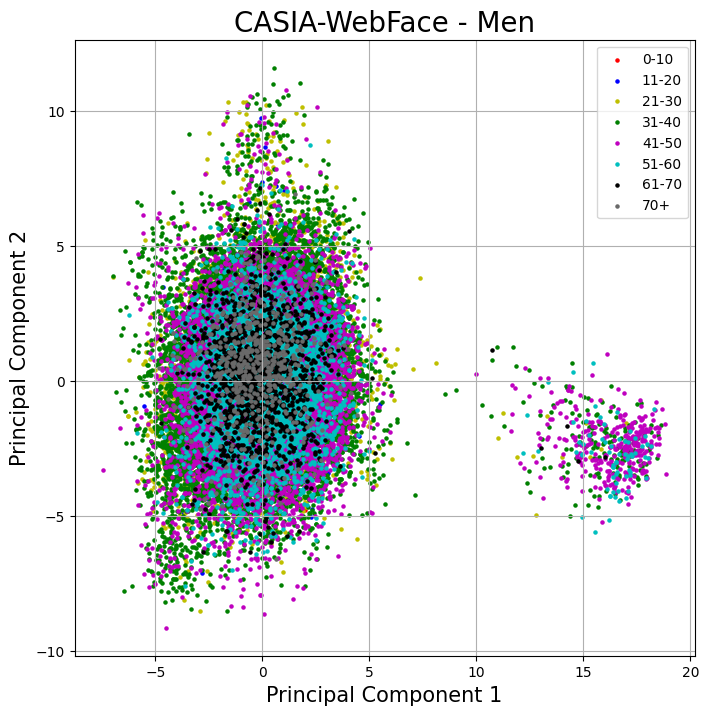

In [28]:
plot_PCA_result(CASIA_df_pca_men, 'Principal Component 1', 'Principal Component 2', 'CASIA-WebFace', 'Men')

In [29]:
plot_PCA_result(CASIA_df_pca_women, 'Principal Component 1', 'Principal Component 2', 'CASIA-WebFace', 'Women')

NameError: name 'CASIA_df_pca_women' is not defined

In [31]:
print("--- EXPLAINED VARIANCE RATIO ---")
print("\n")
print(f"AgeDB all: {AgeDB_ratio_pca}")
print(f"AgeDB men: {AgeDB_ratio_pca_men}")
print(f"AgeDB women: {AgeDB_ratio_pca_women}")
print(f"CASIA all {CASIA_ratio_pca}")
print(f"CASIA men {CASIA_ratio_pca_men}")


--- EXPLAINED VARIANCE RATIO ---


AgeDB all: [0.01396206 0.01268139 0.01249896 0.01202763 0.01139232]
AgeDB men: [0.01727121 0.01519055 0.01498005 0.01430871 0.01389994]
AgeDB women: [0.02438626 0.02174612 0.02031608 0.01877845 0.01785077]
CASIA all [0.01137292 0.01002641 0.00830861 0.00800508 0.00787255]
CASIA men [0.01371028 0.01039789 0.01003059 0.00979468 0.00964762]


In [ ]:
print(f"CASIA women {CASIA_ratio_pca_women}")